In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
%run Cointegration.py

In [8]:
path_data_cart = 'datasets/data_cart.csv'

In [24]:
data = pd.read_csv(path_data_cart, index_col=0)
pairs = pd.read_csv('datasets/cointegrated_pairs.csv')

print('{} to {}'.format(data.index[0], data.index[-1]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

05/04/2019 to 19/06/2020
data: (300, 71)
pairs: (288, 13)


Procura pares que estão quase no ponto de entrada 95% de distância da média e 5% próximo da zona -2 e +2

In [49]:
signal = pairs.loc[(pairs['Signal'] >= 0.95)].copy()
signal.reset_index(drop=True, inplace=True)
signal.shape

(20, 13)

In [50]:
signal = signal.loc[(signal['PeriodQt'] > 2)].sort_values(by=['HalfLife'], ascending=True).copy()
signal.reset_index(drop=True, inplace=True)
signal

,Period,Dependente,Independente,Dickey-Fuller,ADF,Beta,HalfLife,Hurst,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,AZUL4,BBSE3,0.000273,99,3.624776,5,0.239819,0.962281,1.066906,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,BRML3,LREN3,0.031377,95,0.416052,5,0.284764,0.968338,1.104593,Long/Short,5,"180,200,220,240,250"
2,250,IGTA3,LREN3,0.041554,95,1.087977,6,0.317774,0.968757,1.014962,Long/Short,8,"120,140,160,180,200,220,240,250"
3,250,LREN3,MULT3,0.042207,95,1.490895,6,0.312371,0.971070,1.066628,Short/Long,4,"200,220,240,250"
4,250,TOTS3,VIVT4,0.001505,99,3.548974,6,0.264931,0.809289,1.097816,Long/Short,6,"160,180,200,220,240,250"
5,250,IGTA3,USIM5,0.005809,99,4.306023,7,0.285019,0.939125,1.015629,Long/Short,8,"120,140,160,180,200,220,240,250"
6,250,BBDC3,SANB11,0.019923,95,0.736223,8,0.297370,0.987493,1.004259,Long/Short,4,"200,220,240,250"
7,250,CYRE3,MULT3,0.024929,95,1.223257,8,0.333200,0.958080,1.536720,Short/Long,6,"160,180,200,220,240,250"
8,250,HYPE3,TOTS3,0.024153,95,0.117477,8,0.274368,0.649508,1.160705,Short/Long,5,"180,200,220,240,250"
9,250,MULT3,USIM5,0.014515,95,2.449930,8,0.236869,0.921303,0.977390,Long/Short,8,"120,140,160,180,200,220,240,250"


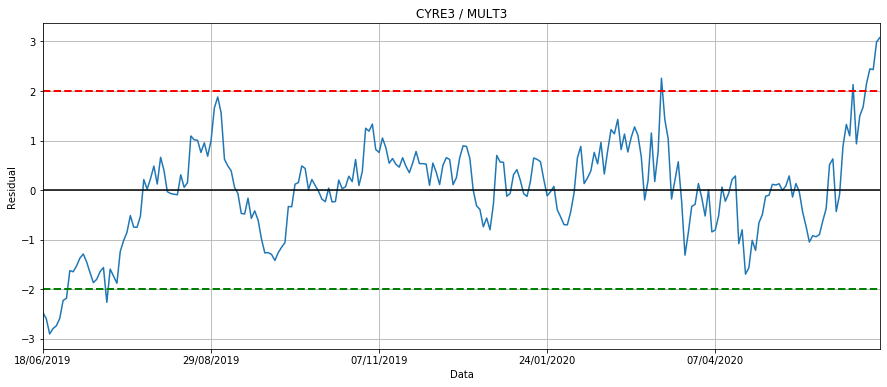

In [57]:
show(data, 'CYRE3', 'MULT3')

Visualiza todos os gráficos de df signal

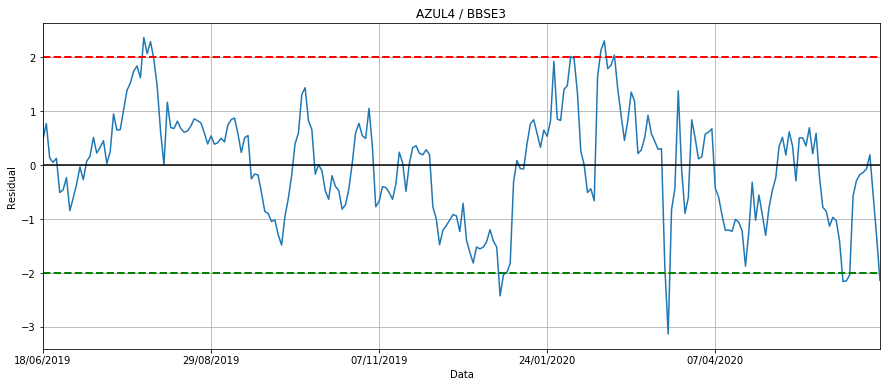

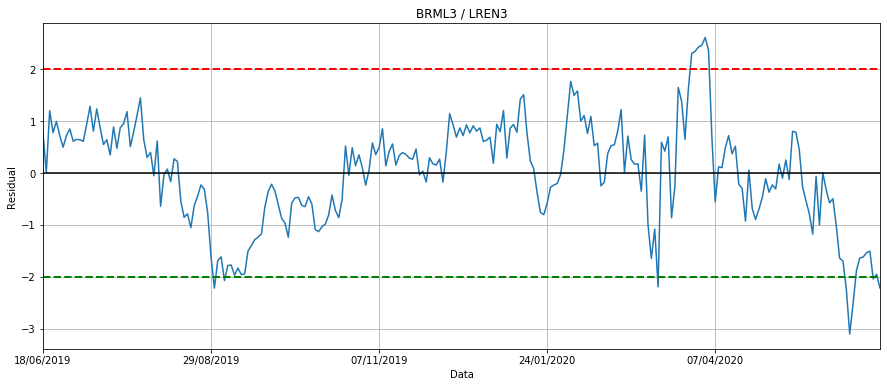

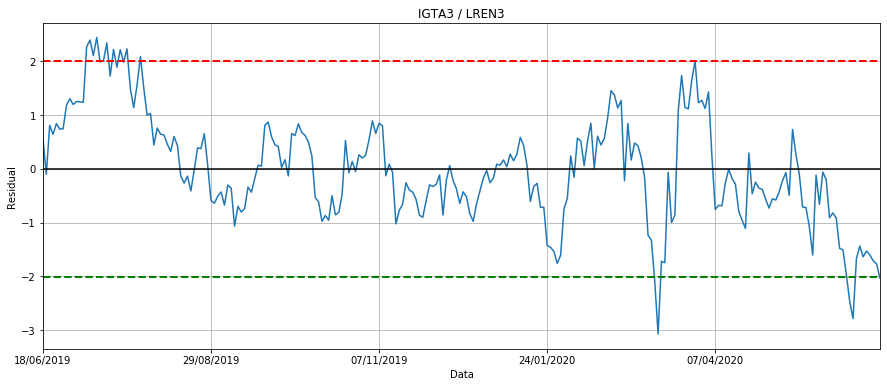

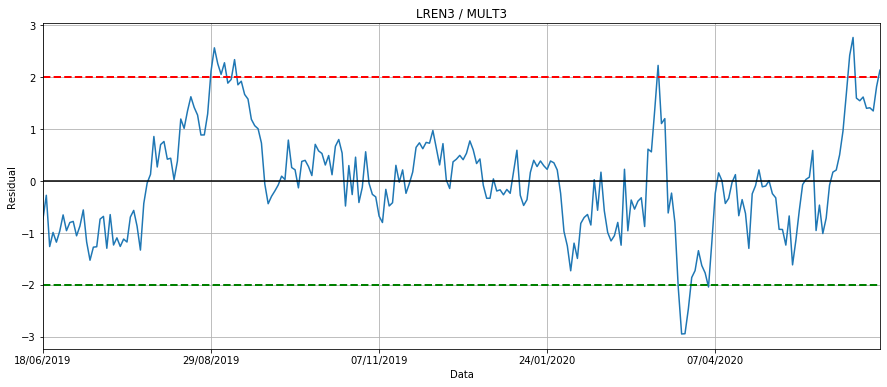

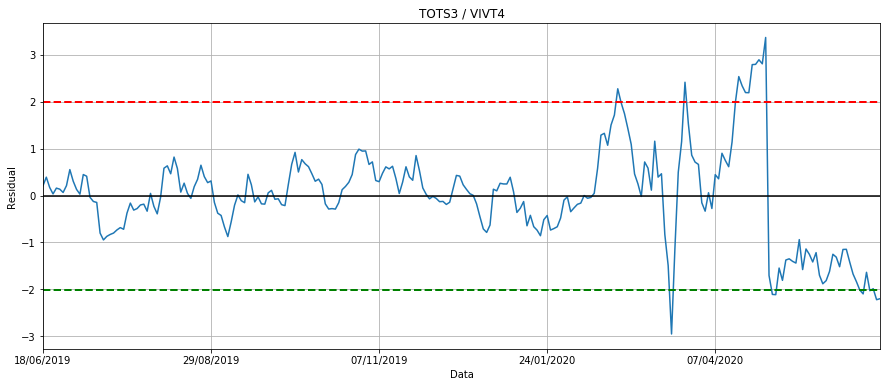

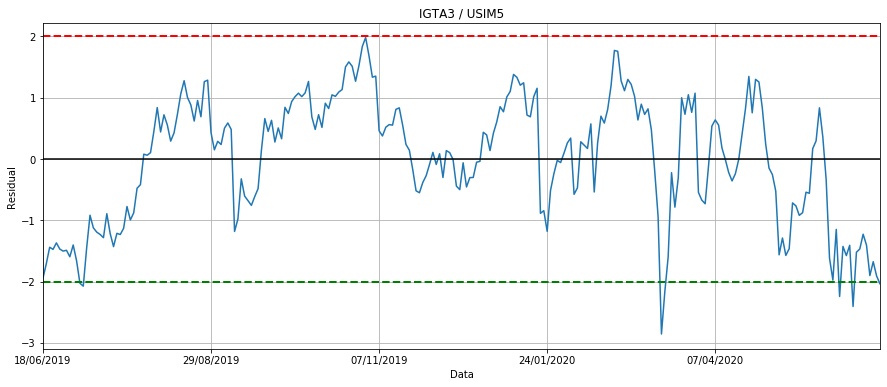

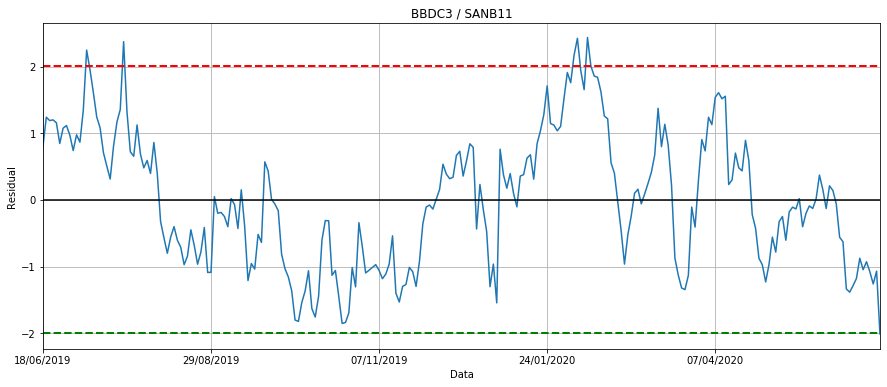

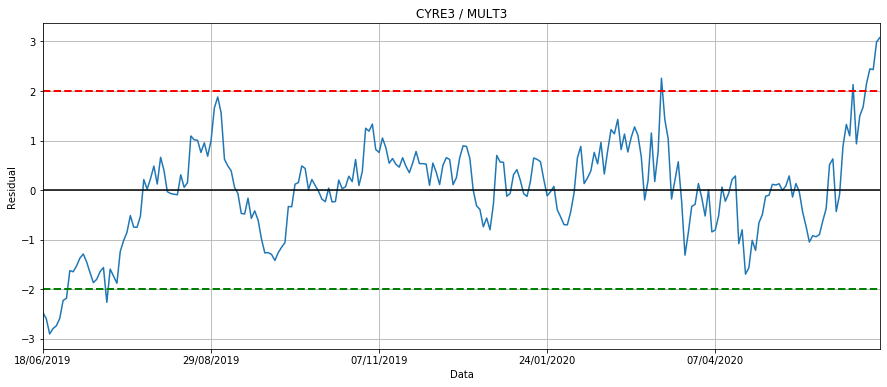

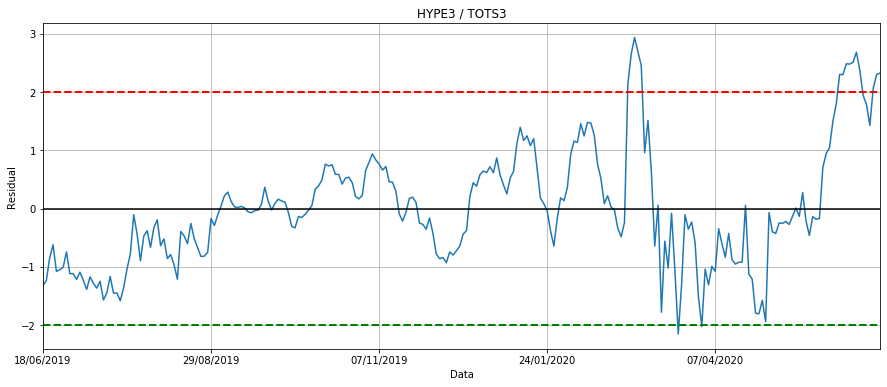

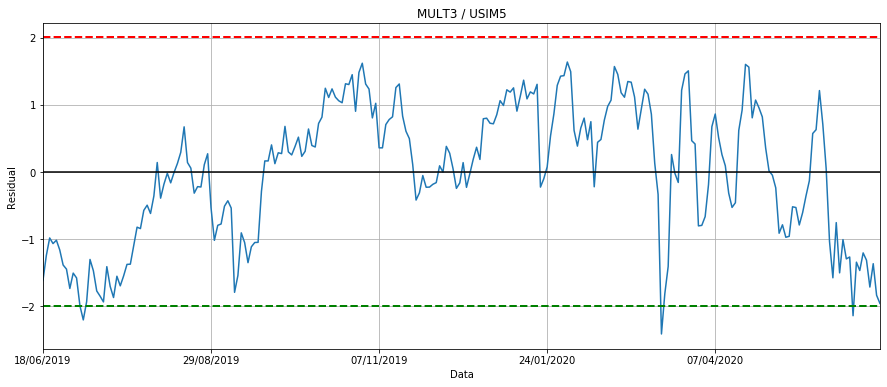

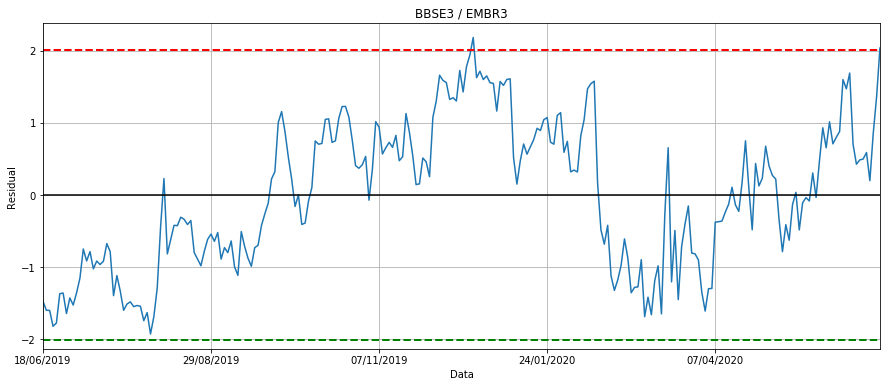

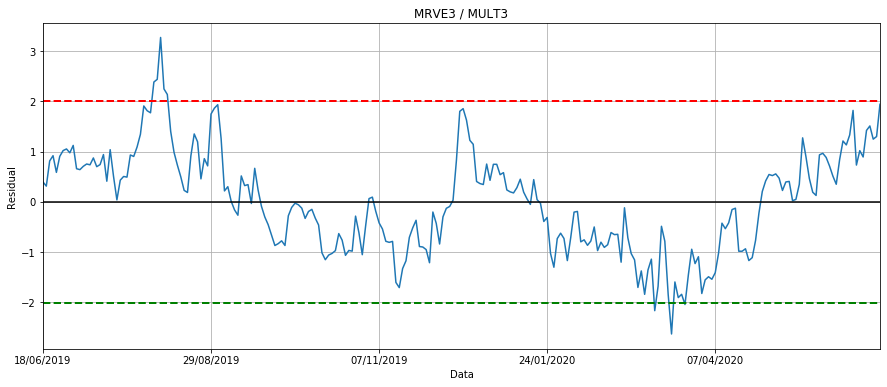

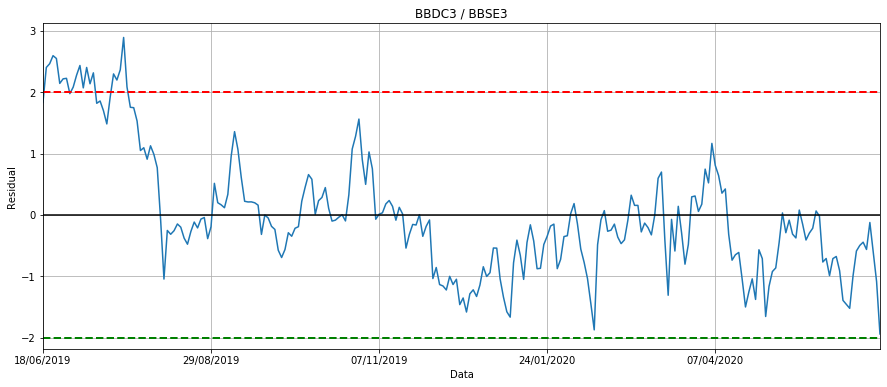

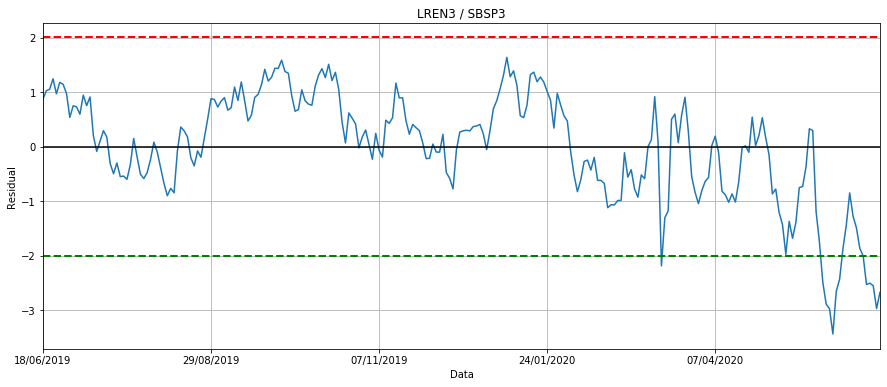

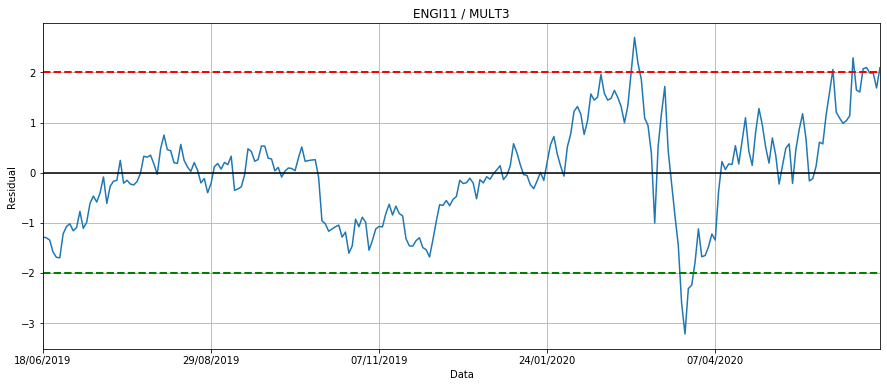

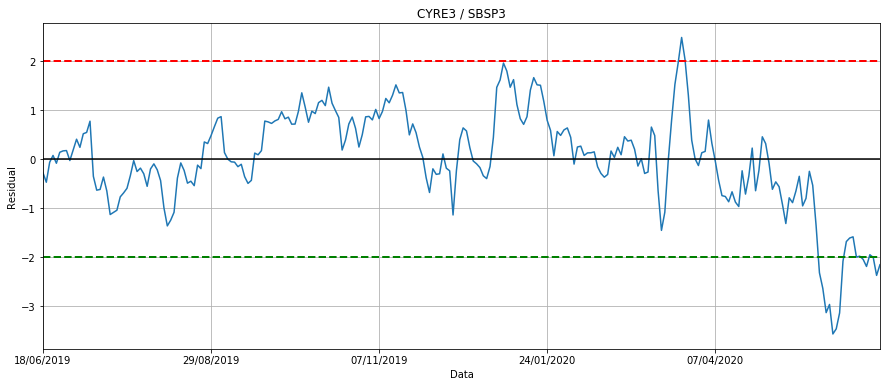

In [56]:
clear_folder('graphic')
for i, j in signal.iterrows():
    y_symbol = j['Dependente']
    x_symbol = j['Independente']
    
    show(data, y_symbol, x_symbol,padronizar=True, savefig='graphic/{}-{}.jpg'.format(y_symbol,x_symbol))